<a href="https://colab.research.google.com/github/nidjosep/student-feedback-analysis/blob/master/Actionable_Insights_from_Student_Feedback_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actionable Insights from Student Feedback: A Sentiment Analysis Approach**

In the realm of education, student feedback is an invaluable resource for enhancing teaching methodologies and course structures. However, the traditional approach of relying on numerical ratings often fails to capture the nuanced sentiments and specific concerns of students. This project aims to revolutionize the way educators interpret and utilize student feedback by employing a sophisticated sentiment analysis approach.

Our objective is to transform raw, textual student feedback into actionable insights, enabling educators to make informed decisions that align closely with student needs and preferences. The project involves three key components:

1.   **Rating-Based Classification:** We begin by classifying student feedback into traditional rating categories (1-5). This provides a baseline understanding of student satisfaction and sets the stage for a deeper analysis.

2.   **Nuanced Sentiment Analysis:** Moving beyond mere numerical ratings, we delve into the underlying sentiments of the feedback. Whether a student feels 'Frustrated', 'Depressed', or finds the course 'Boring', this model aims to identify and categorize these sentiments. This step is crucial as it helps in prioritizing issues based on their emotional impact, ensuring that more critical concerns like student mental well-being are addressed promptly.

3.   **Aspect-Based Sentiment Analysis (ABSA):** The final and most intricate layer of our analysis focuses on specific aspects of the educational experience, such as 'Teaching Experience' and 'Lab Experience'. By dissecting feedback into these aspects and analyzing the associated sentiments, we provide educators with a detailed, aspect-wise breakdown of student opinions. This granular insight allows for targeted improvements in specific areas of the course.


Utilizing a dataset of student feedback from Coursera, coupled with advanced machine learning models, this project sets out to automate the process of feedback analysis. This automation not only scales the feedback analysis process but also ensures a rapid and nuanced understanding of student sentiments. The anticipated outcome is a more effective, responsive, and student-centric educational strategy, ultimately fostering a supportive and conducive learning environment.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mounted at /content/drive
Epoch 1/5
1338/1338 [==============================] - 53s 37ms/step - loss: 0.7024 - accuracy: 0.7567 - val_loss: 0.6100 - val_accuracy: 0.7743
Epoch 2/5
1338/1338 [==============================] - 24s 18ms/step - loss: 0.6050 - accuracy: 0.7771 - val_loss: 0.5900 - val_accuracy: 0.7790
Epoch 3/5
1338/1338 [==============================] - 19s 14ms/step - loss: 0.5759 - accuracy: 0.7850 - val_loss: 0.5860 - val_accuracy: 0.7799
Epoch 4/5
1338/1338 [==============================] - 19s 14ms/step - loss: 0.5579 - accuracy: 0.7910 - val_loss: 0.6010 - val_accuracy: 0.7789
Epoch 5/5
1338/1338 [==============================] - 19s 14ms/step - loss: 0.5431 - accuracy: 0.7964 - val_loss: 0.6042 - val_accuracy: 0.7793


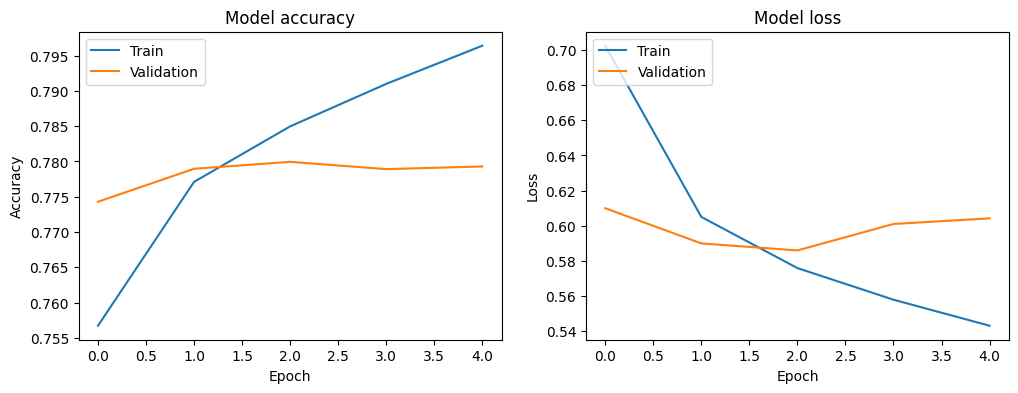

669/669 [==============================] - 4s 5ms/step


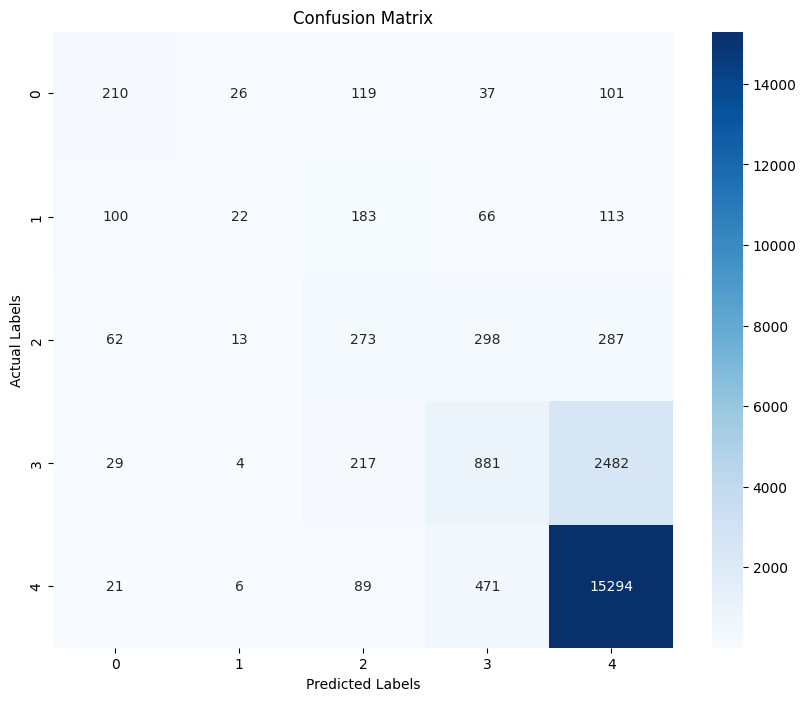

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       493
           1       0.31      0.05      0.08       484
           2       0.31      0.29      0.30       933
           3       0.50      0.24      0.33      3613
           4       0.84      0.96      0.90     15881

    accuracy                           0.78     21404
   macro avg       0.49      0.39      0.41     21404
weighted avg       0.74      0.78      0.75     21404



In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
import tensorflow as tf
from google.colab import drive

# Download NLTK stopwords
nltk.download('stopwords')

# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MCSC/TME_6015/Project/reviews.csv')

# Apply stop word removal
df['Review'] = df['Review'].apply(remove_stop_words)

# Split the data into training and testing sets
train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    df['Review'], df['Label'] - 1, test_size=0.2, random_state=42)

# Convert labels to a numpy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_reviews)
X_train_seq = tokenizer.texts_to_sequences(train_reviews)
X_test_seq = tokenizer.texts_to_sequences(test_reviews)
X_train_pad = pad_sequences(X_train_seq, maxlen=150)  # Adjust maxlen as needed
X_test_pad = pad_sequences(X_test_seq, maxlen=150)

# Building the LSTM model with cuDNN optimization
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=150))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2))  # Removed recurrent_dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax', dtype='float32'))  # Ensure output layer uses float32


# Compile the model with adjusted learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, train_labels, batch_size=64, epochs=5,
                    validation_data=(X_test_pad, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Evaluate the model
model.evaluate(X_test_pad, test_labels)

# Predict classes
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Print the classification report
print(classification_report(test_labels, y_pred_classes))